## MATH 6388: Statistical and Machine Learning

### Lecture 3: Linear models for classification, loss function, and evaluation

### Instructor: Farhad Pourkamali 

#### Department of Mathematical and Statistical Sciences
#### University of Colorado Denver


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388/blob/main/Lecture3_LogReg.ipynb)




### Overview 
<hr style="border:2px solid gray">

* Logistic regression involves a probabilistic model of the form $p(y|\mathbf{x};\boldsymbol{\theta})$, where $\mathbf{x}\in\mathbb{R}^D$ is a fixed-dimensional input vector 
    * $C=2$: binary logistic regression $\rightarrow y\in\{0,1\}$ 
    * $C>2$: multinomial/multiclass logistic regression $\rightarrow y\in\{1,2,\ldots,C\}$
    
* Recall the pmf of the Bernoulli distribution 
$$Ber(y|\theta)=\begin{cases}\theta &\text{ if } y=1\\1-\theta &\text{ if } y=0\end{cases}=\theta^y(1-\theta)^{1-y}$$

* Binary logistic regression

$$p(y|\mathbf{x};\boldsymbol{\theta})=Ber(y|\color{red}{\sigma(f(\mathbf{x};\boldsymbol{\theta}))})$$

where the sigmoid or logistic function is defined as $\sigma(a):=\frac{1}{1+\exp(-a)}$

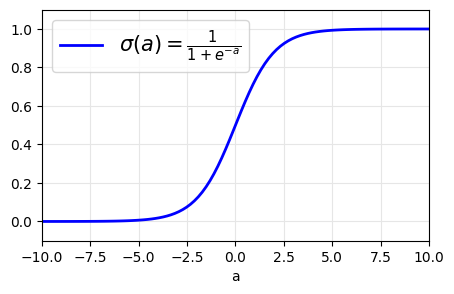

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

a = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-a))
plt.figure(figsize=(5, 3))
plt.plot(a, sig, "b-", linewidth=2, label=r"$\sigma(a) = \frac{1}{1 + e^{-a}}$")
plt.xlabel("a")
plt.legend(loc="upper left", fontsize=15)
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(color='0.9')
plt.show()

### Properties of sigmoid function
<hr style="border:2px solid gray">

* The derivative of $\sigma(a)$ has a nice form

$$\begin{align}\sigma(a)&=\frac{1}{1+e^{-a}}=(1+e^{-a})^{-1}\\
\frac{d}{da}\sigma(a)&=(-1)(1+e^{-a})^{-2}(1+e^{-a})'\\
\frac{d}{da}\sigma(a)&=(-1)(1+e^{-a})^{-2}(-e^{-a})\\
\frac{d}{da}\sigma(a)&=\frac{1}{1+e^{-a}}\frac{e^{-a}}{1+e^{-a}}=\sigma(a)(1-\sigma(a))
\end{align}$$


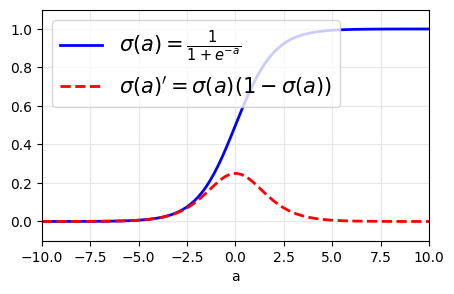

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

a = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-a))
plt.figure(figsize=(5, 3))
plt.plot(a, sig, "b-", linewidth=2, label=r"$\sigma(a) = \frac{1}{1 + e^{-a}}$")
plt.plot(a, sig*(1-sig), "r--", linewidth=2, label=r"$\sigma(a)'=\sigma(a)(1-\sigma(a))$")
plt.xlabel("a")
plt.legend(loc="upper left", fontsize=15)
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(color='0.9')
plt.show()

### Back to binary classification
<hr style="border:2px solid gray">

* Plugging the definition of the sigmoid function

$$p(y=1|\mathbf{x};\boldsymbol{\theta})=\sigma(a)=\frac{1}{1+e^{-a}}=\frac{e^a}{1+e^a}$$
$$p(y=0|\mathbf{x};\boldsymbol{\theta})=1-\sigma(a)=\frac{e^{-a}}{1+e^{-a}}=\frac{1}{1+e^a}$$

* The quantity $a$ is known as the log-odds or logit

$$\log\Big(\frac{p(y=1|\mathbf{x};\boldsymbol{\theta})}{p(y=0|\mathbf{x};\boldsymbol{\theta})}\Big)=\log\Big(e^a\Big)=a$$

* The inverse of the sigmoid function is called the *logit function*

$$\sigma^{-1}(p)=\log\big(\frac{p}{1-p}\big):=\text{logit}(p)$$

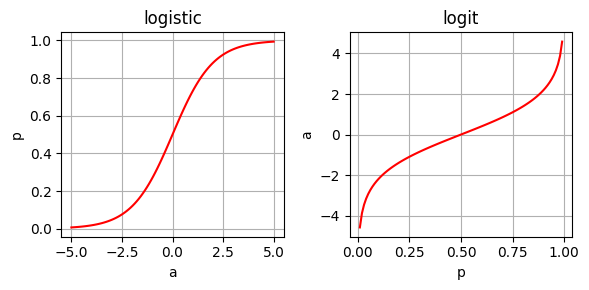

In [3]:
import numpy as np
from scipy.special import expit, logit
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(6,3))

# expit 
x = np.linspace(-5, 5, 100)
ax[0].plot(x, expit(x), 'r')
ax[0].set_xlabel('a')
ax[0].set_ylabel('p')
ax[0].grid()
ax[0].set_title('logistic')

# logit 
x = np.linspace(0, 1, 100)
ax[1].plot(x, logit(x), 'r')
ax[1].set_xlabel('p')
ax[1].set_ylabel('a')
ax[1].grid()
ax[1].set_title('logit')

plt.tight_layout()
plt.show()

### Linear model for binary logistic regression
<hr style="border:2px solid gray">

* Use a linear function of the form $f(\mathbf{x};\mathbf{w})=\mathbf{w}^T\mathbf{x}$, yielding the following pmf

$$p(y|\mathbf{x};\mathbf{w})=Ber(y|\sigma(\mathbf{w}^T\mathbf{x}))$$

* Thus, we get 

$$p(y=1|\mathbf{x};\mathbf{w})=\sigma(\mathbf{w}^T\mathbf{x})=\frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x})}$$

* Although sigmoid is a nonlinear function, we have a *linear* classifier


### Building loss function with the likelihood approach
<hr style="border:2px solid gray">

* The negative log likelihood (scaled by the dataset size N) is given by 
 * For simplicity: $\mu_n=\sigma(a_n)$
 
 $$\begin{align}\text{NLL}(\mathbf{w})&=-\frac{1}{N}\sum_{n=1}^N\log Ber(y_n|\mu_n) \\ &=-\frac{1}{N}\sum_{n=1}^N\log\big[\mu_n^{y_n}(1-\mu_n)^{1-y_n}\big]\\&=-\frac{1}{N}\sum_{n=1}^N\big[y_n\log \mu_n + (1-y_n)\log(1-\mu_n)\big]\\&=\frac{1}{N}\sum_{n=1}^N\text{H}_{ce}(y_n,\mu_n)\end{align}$$
 

### Understanding the loss function
<hr style="border:2px solid gray">

$$\text{H}_{ce}(y_n,\mu_n)=\begin{cases}-\log(\mu_n) & \text{ if } y_n=1 \\ -\log(1-\mu_n) &\text{ if } y_n=0\end{cases}$$


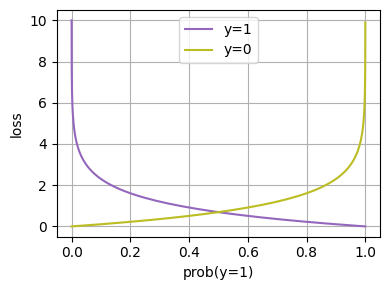

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.special import expit

def cross_entropy_loss(y, mu):
    if y == 1:
        return -np.log(mu)
    else:
        return -np.log(1 - mu)

z = np.arange(-10, 10, 0.1)
mu_z = expit(z)

cost_1 = cross_entropy_loss(1, mu_z) # when y = 1
cost_0 = cross_entropy_loss(0, mu_z) # when y = 0 

fig, ax = plt.subplots(figsize=(4,3))
plt.plot(mu_z, cost_1, 'C4-', label='y=1')
plt.plot(mu_z, cost_0, 'C8-', label='y=0')
plt.xlabel('prob(y=1)')
plt.ylabel('loss')
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

### Deriving the gradient - part 1
<hr style="border:2px solid gray">

* Let us start with computing $\nabla_{\mathbf{w}} \log \mu_n$, where $\mu_n=\sigma(a_n)$ and $a_n=\mathbf{w}^T\mathbf{x}_n$
 * Find the partial derivative wrt $w_k$
 
 $$\begin{align}\frac{\partial}{\partial w_k}\mu_n&=\frac{\partial}{\partial a_n}\sigma(a_n)\frac{\partial}{\partial w_k}a_n\\&=\sigma(a_n)(1-\sigma(a_n))x_{n,k}=\mu_n(1-\mu_n)x_{n,k}\end{align}$$
 
 * Hence
 $$\nabla_{\mathbf{w}} \mu_n=\mu_n(1-\mu_n)\mathbf{x}_n $$
 
 * As a result
 $$\nabla_{\mathbf{w}}\log\mu_n=\frac{1}{\mu_n}\nabla_{\mathbf{w}}\mu_n=(1-\mu_n)\mathbf{x}_n$$



### Deriving the gradient - part 2
<hr style="border:2px solid gray">

* Gradient of the second term 

$$\nabla_{\mathbf{w}} \log(1-\mu_n)=\frac{1}{1-\mu_n}\nabla_{\mathbf{w}}(1-\mu_n)=\frac{-1}{1-\mu_n}\nabla_{\mathbf{w}}\mu_n=-\mu_n\mathbf{x}_n$$

* Gradient of NLL

$$\begin{align}\nabla_{\mathbf{w}}\text{NLL}(\mathbf{w})&=-\frac{1}{N}\sum_{n=1}^N\big[y_n\nabla_{\mathbf{w}}\log\mu_n+(1-y_n)\nabla_{\mathbf{w}}\log(1-\mu_n)\big]\\&=-\frac{1}{N}\sum_{n=1}^N [y_n\mathbf{x}_n-\mu_n\mathbf{x}_n]=\frac{1}{N}\sum_{n=1}^N(\mu_n-y_n)\mathbf{x}_n\end{align}$$

* Compact form with the data matrix $\mathbf{X}\in\mathbb{R}^{N\times D}$ and the response vector $\mathbf{y}\in\mathbb{R}^{N\times 1}$

$$\nabla_{\mathbf{w}}\text{NLL}(\mathbf{w})=\frac{1}{N}\mathbf{X}^T\big(\sigma(\mathbf{X\mathbf{w}})-\mathbf{y}\big)$$





### Stochastic gradient descent (SGD)
<hr style="border:2px solid gray">

* If we use a minibatch of size 1, then we get the following simple update equation 

$$\mathbf{w}_{t+1}=\mathbf{w}_t-\eta_t\nabla_{\mathbf{w}} \text{NLL}(\mathbf{w}_t)$$

$$\mathbf{w}_{t+1}=\mathbf{w}_t-\eta_t\big(\sigma(\mathbf{w}_t^T\mathbf{x}_n)-y_n\big)\mathbf{x}_n$$

where the average is replaced with a single randomly chosen data point $(\mathbf{x}_n,y_n)$ 

### Multinomial logistic regression
<hr style="border:2px solid gray">

* To represent a distribution over a finite set of labels, $y\in\{1,\ldots,C\}$, we can use the categorical distribution, which generalizes the Bernoulli to $C>2$ values

$$\text{Cat}(y|\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{I(y=c)}$$

where $\boldsymbol{\theta}=[\theta_1,\ldots,\theta_C]$, $0\leq \theta_c\leq 1$, and $\sum_{c=1}^C\theta_c=1$

* A classification model of the following form 

$$\begin{align}p(y|\mathbf{x};\boldsymbol{\theta})&=\text{Cat}\big(y|f(\mathbf{x};\boldsymbol{\theta})\big)\\&= \text{Cat}\big(y|\text{softmax}(\mathbf{W}\mathbf{x})\big)\end{align}$$

where $\mathbf{W}\in\mathbb{R}^{C\times D}$

* Let $\mathbf{a}=\mathbf{W}\mathbf{x}\in\mathbb{R}^C$ be the vector of logits

$$p(y=c|\mathbf{x};\boldsymbol{\theta})=\frac{e^{a_c}}{\sum_{c'=1}^Ce^{a_{c'}}}$$

* The definition of cross-entropy between two probabilities

$$H_{ce}(\mathbf{p},\mathbf{q})=-\sum_{c=1}^Cp_c\log q_c$$

In [5]:
def stable_softmax(x):
    z = x - max(x)
    numerator = np.exp(z)
    denominator = np.sum(numerator)
    softmax = numerator/denominator
    return softmax 

print(stable_softmax(np.array([1, -2, 3])))

[0.11849965 0.00589975 0.8756006 ]


In [6]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [7]:
iris['data'] 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris['target'].value_counts()


0    50
1    50
2    50
Name: target, dtype: int64

In [9]:
iris['target_names']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
from sklearn.linear_model import LogisticRegression 

X = iris["data"][["petal length (cm)","petal width (cm)"]].to_numpy()  
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 20).reshape(-1, 1),
        np.linspace(0.8, 2.7, 10).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

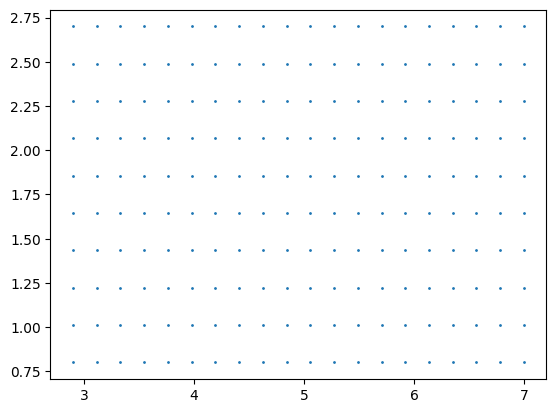

In [11]:
plt.scatter(X_new[:,0], X_new[:,1], s=1)
plt.show()

In [12]:
y_proba[0]

array([9.99492031e-01, 5.07969365e-04])

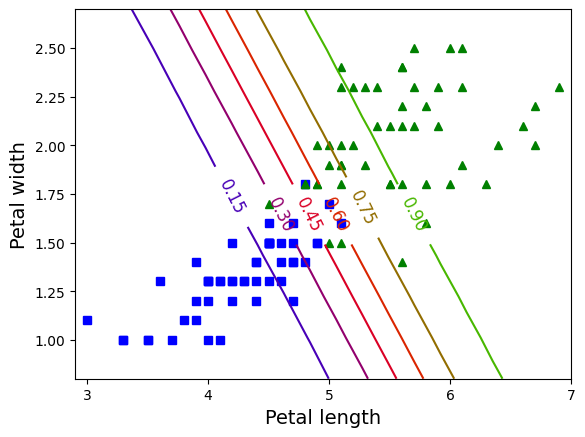

In [13]:
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

plt.rcParams.update({'font.size': 16, "figure.figsize": (5,3)})
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [14]:
# How to find P=0.5? 

# w0 + w1 * x1 + w2 * x2 = 0 
# x_2 = - (w1 * x1 + w0) / w2 

left_right = np.array([2.9, 7])

boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

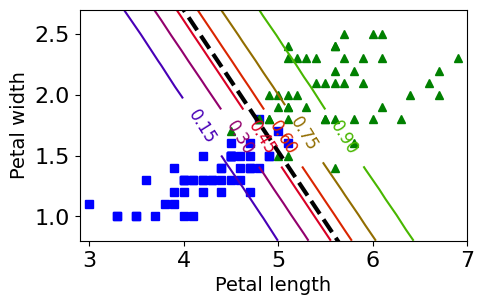

In [15]:
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

plt.rcParams.update({'font.size': 16, "figure.figsize": (5,3)})
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.plot(left_right, boundary, "k--", linewidth=3)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()


### Evaluation
<hr style="border:2px solid gray">

* Evaluating a classifier is more complicated than evaluating a regression model because of categorical labels
    * Unlike regression problems, we cannot use the Euclidean distance between actual and predicted labels 
    * In practice, we have to look at various metrics in the form of a score, matrix, or curve
        + Confusion matrix
        + Precision
        + Recall
        + $F_1$ score
        + Precision/recall curve
        + Receiver Operating Characteristic (ROC) curve 

### Binary classification using MNIST 
<hr style="border:2px solid gray">

* MNIST is one of the most popular benchmark data sets in machine learning, which can be accessed via scikit-learn 
    * Thus, it involves minimal to no preprocessing 

* 70,000 images, each labeled with the digit it represents
    * Each image is 28 x 28 pixels, i.e., a 2D array, but stored as a 1D array with 784 features
        + Note that $28^2=784$
    * Each feature shows the intensity of one pixel 
        + The grayscale intensity values between 0 and 255,  corresponding to shades of gray
        + 0 being the lightest (white) and 255 being the darkest (black)

In [16]:
import numpy as np

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

mnist.keys()

/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
mnist['data'].shape # 70,000 images in R^784 

(70000, 784)

In [18]:
mnist['target'] # 70,000 labels 

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [19]:
# Identify input features and labels 

X, y = mnist.data, mnist.target

In [20]:
# Let us look at the label of this image and its type

print(y[0],'\n', type(y[0]))

5 
 <class 'str'>


In [21]:
# train/test split 

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [22]:
# create a binary classification problem (detecting digit 5) 

y_train_5 = (y_train == '5')

y_test_5 = (y_test == '5')

y_train_5[:10] 

array([ True, False, False, False, False, False, False, False, False,
       False])

In [23]:
# We select a classifier and measure its "accuracy" using cross validation 

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# accuracy: the fraction of correct predictions over the total number of samples 
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [24]:
# Let us investigate this "amazing" result more by defining a 
# classifier that always returns False  

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass  # no training 
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) # return False for every input image 
    

cross_val_score(Never5Classifier(), X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

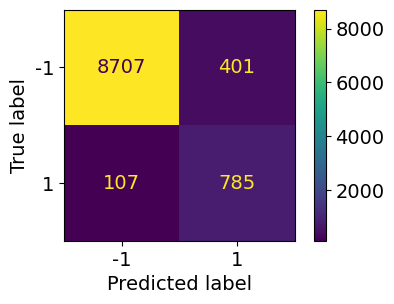

In [25]:
# In this cell, we investigate one of the most popular ways of evaluating classifiers 

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

sgd_clf.fit(X_train, y_train_5)

y_pred_5 = sgd_clf.predict(X_test)

import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,3)})

ConfusionMatrixDisplay.from_predictions(y_test_5, y_pred_5, display_labels=np.array([-1,1]))

plt.show()

### Confusion matrix 
<hr style="border:2px solid gray">

* Each row in a confusion matrix represents an actual class, while each column represents a predicted class

    * The first row of this matrix considers non-5 images (negative class)
    * The second row considers the images of 5s (positive class)
    
    <img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/confusion_matrix.png?raw=true\" width=300>
    

In [26]:
from sklearn.metrics import precision_score, recall_score

print("Precision: %0.2f" %precision_score(y_test_5, y_pred_5))

print("Recall: %0.2f" %recall_score(y_test_5, y_pred_5))

Precision: 0.66
Recall: 0.88


### Precision and recall
<hr style="border:2px solid gray">

* We can combine precision and recall into a single metric called the $F_1$ score using the harmonic mean
    * A classifier gets a high $F_1$ score if both recall and precision are high 
    
$$F_1=\frac{2}{\frac{1}{\text{pre}}+ \frac{1}{\text{rec}}}=2\times \frac{\text{pre}\times \text{rec}}{\text{pre} + \text{rec}}$$

* Also, we can plot precision/recall values as a function of the threshold used for classification 
    * compute a score based on a *decision function*
    * If that score is greater than a threshold, it assigns the instance to the positive class; otherwise it assigns it to the negative class
        + Raising the threshold will increase the precision score (because we decrease FP)
            + The classifier becomes more conservative in making positive predictions
        + Lowering the threshold will increase the recall score (because we decrease FN)
            + The classifier becomes more conservative in making positive predictions

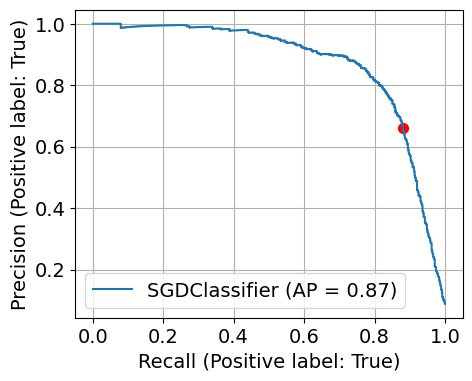

In [27]:
from sklearn.metrics import PrecisionRecallDisplay

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,4)})

# Use the fitted classifier sgd_clf
PrecisionRecallDisplay.from_estimator(sgd_clf, X_test, y_test_5)

# Previous results 
plt.scatter(recall_score(y_test_5, y_pred_5), precision_score(y_test_5, y_pred_5), c = 'r', s=50)

plt.grid()

plt.show()

### ROC Curve
<hr style="border:2px solid gray">

* The ROC curve plots the true positive rate (TPR or recall) against the false positive rate (FPR)
    * We have $\text{FPR} = 1- \text{TNR}$
    
* This means that the top left corner of the plot is the "ideal" point -- a false positive rate of zero, and a true positive rate of one

* In an ROC Curve, the diagonal represents the baseline model/random classifier
    * The closer an ROC curve comes to the 45-degree diagonal of the ROC space, the less powerful is the model
    
* The ROC AUC is the area under the ROC curve
    * It quantifies the overall performance of the classifier across different decision thresholds
    * An AUC-ROC of 1.0 means perfect discrimination, where the classifier has achieved a TPR of 1 and an FPR of 0
    * An AUC-ROC of 0.5 means the classifier is no better than random

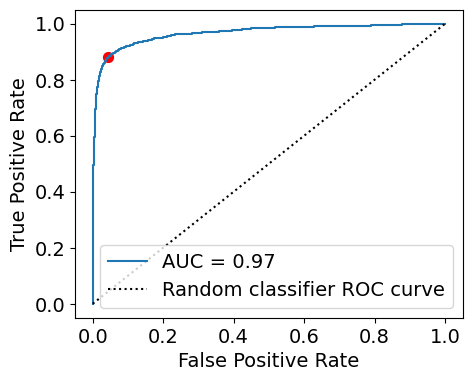

In [28]:
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import RocCurveDisplay

y_score_5 = sgd_clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test_5, y_score_5)

roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

plt.plot([0, 1], [0, 1], 'k:', label="Random classifier ROC curve")

# Previous results 
plt.scatter(1 - recall_score(y_test_5, y_pred_5, pos_label=False), recall_score(y_test_5, y_pred_5), c = 'r', s=50) 

plt.legend()

plt.show()

In [29]:
# multi-class classification 

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

sgd_clf.fit(X_train[:10000], y_train[:10000]) # y_train not y_train_5 (thus, 10 classes)

SGDClassifier(random_state=42)

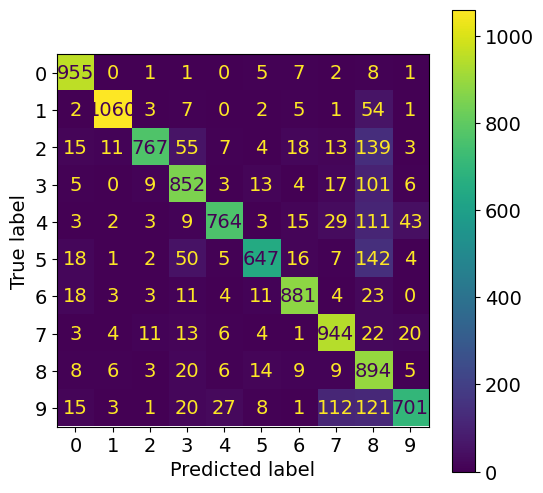

In [30]:
plt.rcParams.update({'font.size': 14, "figure.figsize": (6,6)})

y_test_pred = sgd_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)